In [1]:
'''
This file plots CMIP5 RCP - HIST over South Australia
/Users/earl/Desktop/Yang
and places the outputs in
/Users/earl/Dropbox/CMIP5/figures

Earl Duran 
created: 19-Mar-18
e.duran@unsw.edu.au
'''

import os
import xarray as xr
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib
import sys
def find_nearest_index(array, value):
    return int((np.abs(array - value)).argmin())



In [2]:
%%javascript
IPython.notebook.kernel.execute('nb_name = ' + '"' + IPython.notebook.notebook_name + '"')

<IPython.core.display.Javascript object>

In [3]:
os.system('sshfs \
erd561@raijin.nci.org.au:/g/data/e14/erd561/CMIP5/bromeliad/ \
/Users/earl/Desktop/Demeter')

256

In [4]:
script_name = nb_name[:-6]
print(script_name)
figures_path = '/Users/earl/Dropbox/CMIP5/figures/'


hist_data_path = '/Users/earl/Desktop/Demeter/historical/'
hist_tos_path = hist_data_path + 'mon/ocean/r1i1p1/tos/latest/'
hist_tauuo_path = hist_data_path + 'mon/ocean/r1i1p1/tauuo/latest/'
hist_tos_list = sorted(os.listdir(hist_tos_path))
hist_tauuo_list = sorted(os.listdir(hist_tauuo_path))
#print(hist_models_list)


rcp85_data_path = '/Users/earl/Desktop/Demeter/rcp85/'
rcp85_tos_path = rcp85_data_path + 'mon/ocean/r1i1p1/tos/latest/'
rcp85_tauuo_path = rcp85_data_path + 'mon/ocean/r1i1p1/tauuo/latest/'
rcp85_tos_list = sorted(os.listdir(rcp85_tos_path))
rcp85_tauuo_list = sorted(os.listdir(rcp85_tauuo_path))
#print(rcp85_models_list)


#print('\n')
good_tos_list = []
for hist_tos in hist_tos_list:
    for rcp85_tos in rcp85_tos_list:
        hist_tos_now = hist_tos[:-17]
        rcp85_tos_now = rcp85_tos[:-17]
        if hist_tos_now == rcp85_tos_now:
            #print(hist_tos_now + ' OK!')
            good_tos_list.append(hist_tos_now)
#print(len(good_tos_list))
            
#print('\n')
good_tauuo_list = []
for hist_tauuo in hist_tauuo_list:
    for rcp85_tauuo in rcp85_tauuo_list:
        hist_tauuo_now = hist_tauuo[:-17]
        rcp85_tauuo_now = rcp85_tauuo[:-17]
        if hist_tauuo_now == rcp85_tauuo_now:
            #print(hist_tauuo_now + ' OK!')
            good_tauuo_list.append(hist_tauuo_now)
#print(len(good_tauuo_list))

print('\n')
good_list = []
for all_tos in good_tos_list:
    for all_tauuo in good_tauuo_list:
        if all_tos == all_tauuo:
            print(all_tos + ' OK!')
            good_list.append(all_tos)
print(len(good_list))

#print(good_list)


p04_plot_RCP-HIST


ACCESS1-0 OK!
ACCESS1-3 OK!
CESM1-BGC OK!
CESM1-CAM5 OK!
CMCC-CMS OK!
CMCC-CM OK!
CNRM-CM5 OK!
CSIRO-Mk3-6-0 OK!
CanESM2 OK!
FGOALS-s2 OK!
FIO-ESM OK!
GFDL-CM3 OK!
GFDL-ESM2G OK!
GFDL-ESM2M OK!
HadGEM2-AO OK!
IPSL-CM5A-LR OK!
IPSL-CM5A-MR OK!
IPSL-CM5B-LR OK!
MIROC-ESM-CHEM OK!
MIROC-ESM OK!
MIROC5 OK!
MPI-ESM-LR OK!
MPI-ESM-MR OK!
MRI-CGCM3 OK!
MRI-ESM1 OK!
NorESM1-ME OK!
NorESM1-M OK!
inmcm4 OK!
28


In [5]:
tos_hist = {}
tos_rcp85 = {}
tos_anom = {}
tos_lat = {}
tos_lon = {}

tauuo_hist = {}
tauuo_rcp85 = {}
tauuo_anom = {}
tauuo_lat = {}
tauuo_lon = {}

plot_list = []

for model in good_list:
    
    # These models are hard to deal with:
    # MIROC5 and inmcm4 have a crazy rotated grid
    # MPI-ESM-LR has a weird grid too
    if model in ['MIROC5', 'MPI-ESM-LR', 'inmcm4']:
        continue
    
    plot_list.append(model)
    
    tos_hist_data = xr.open_dataset(hist_tos_path + model + '_1981-2000mean.nc')
    tos_rcp85_data = xr.open_dataset(rcp85_tos_path + model + '_2081-2100mean.nc')
    tos_hist[model] = tos_hist_data['tos'][0,:,:]
    tos_rcp85[model] = tos_rcp85_data['tos'][0,:,:]
    
    tauuo_hist_data = xr.open_dataset(hist_tauuo_path + model + '_1981-2000mean.nc')
    tauuo_rcp85_data = xr.open_dataset(rcp85_tauuo_path + model + '_2081-2100mean.nc')
    tauuo_hist[model] = tauuo_hist_data['tauuo'][0,:,:]
    tauuo_rcp85[model] = tauuo_rcp85_data['tauuo'][0,:,:]

    # MPI-ESM-LR has its lon cut-off over Australia
    if model in ['MPI-ESM-LR']:
        tos_hist_now = tos_hist[model]
        tos_hist[model] = tos_hist_now.roll(i=100)
        tos_rcp85_now = tos_rcp85[model]
        tos_rcp85[model] = tos_rcp85_now.roll(i=100)
        
        tauuo_hist_now = tauuo_hist[model]
        tauuo_hist[model] = tauuo_hist_now.roll(i=100)
        tauuo_rcp85_now = tauuo_rcp85[model]
        tauuo_rcp85[model] = tauuo_rcp85_now.roll(i=100)
    
    tos_anom[model] = tos_rcp85[model]-tos_hist[model]
    tauuo_anom[model] = tauuo_rcp85[model]-tauuo_hist[model]
    
    if len(tos_hist_data['lat'].shape) is 2:
        # MPI-ESM-LR and MPI-ESM-MR longitude index should be taken from the end
        if model in ['MPI-ESM-LR', 'MPI-ESM-MR']:
            tos_lat[model] = tos_hist_data['lat'][:,0]
            tos_lon[model] = tos_hist_data['lon'][-1,:]
            tauuo_lat[model] = tauuo_hist_data['lat'][:,0]
            tauuo_lon[model] = tauuo_hist_data['lon'][-1,:]
            print(model + ' OK!')
            
        else:
            tos_lat[model] = tos_hist_data['lat'][:,0]
            tos_lon[model] = tos_hist_data['lon'][0,:]
            tauuo_lat[model] = tauuo_hist_data['lat'][:,0]
            tauuo_lon[model] = tauuo_hist_data['lon'][0,:]
            print(model + ' OK!')
        
    else:
        tos_lat[model] = tos_hist_data['lat'][:]
        tos_lon[model] = tos_hist_data['lon'][:]
        tauuo_lat[model] = tos_hist_data['lat'][:]
        tauuo_lon[model] = tos_hist_data['lon'][:]
        print(model + ' OK!')
    
    # The GFDL models run need this lon offset fix ...
    if model in ['GFDL-CM3', 'GFDL-ESM2G', 'GFDL-ESM2M']:
        tos_lon[model][0:100] += 360
        tauuo_lon[model][0:100] += 360
    
    # MPI-ESM-LR lon needs to be offset...
    if model in ['MPI-ESM-LR']:
        tos_lon[model] -= 180
        tauuo_lon[model] -= 180
    
    # Also, MPI-ESM-LR and MPI-ESM-MR are flipped upside down...
    # Couldn't find a flip function in xarray...
    if model in ['MPI-ESM-LR', 'MPI-ESM-MR']:
        tos_anom_now = tos_anom[model]
        tos_anom[model] = np.flipud(tos_anom_now)
        tauuo_anom_now = tauuo_anom[model]
        tauuo_anom[model] = np.flipud(tauuo_anom_now)
        
        tos_lat_now = tos_lat[model]
        tos_lat[model] = np.flipud(tos_lat_now)
        tauuo_lat_now = tauuo_lat[model]
        tauuo_lat[model] = np.flipud(tauuo_lat_now)
        
    # HadGEM2-AO, MRI-CGCM3 and MRI-ESM1 need to have their wind stress land masked...
    if model in ['HadGEM2-AO', 'MRI-CGCM3', 'MRI-ESM1']:
        # anything that satisfies the condition is SAFE
        tauuo_anom[model] = tauuo_anom[model].where((tauuo_anom[model] != 0), np.nan)
        
print(len(plot_list))   
        

ACCESS1-0 OK!
ACCESS1-3 OK!
CESM1-BGC OK!
CESM1-CAM5 OK!
CMCC-CMS OK!
CMCC-CM OK!
CNRM-CM5 OK!
CSIRO-Mk3-6-0 OK!
CanESM2 OK!
FGOALS-s2 OK!
FIO-ESM OK!
GFDL-CM3 OK!
GFDL-ESM2G OK!
GFDL-ESM2M OK!
HadGEM2-AO OK!
IPSL-CM5A-LR OK!
IPSL-CM5A-MR OK!
IPSL-CM5B-LR OK!
MIROC-ESM-CHEM OK!
MIROC-ESM OK!
MPI-ESM-MR OK!
MRI-CGCM3 OK!
MRI-ESM1 OK!
NorESM1-ME OK!
NorESM1-M OK!


NameError: name 'plot_tos_list' is not defined

In [14]:
thefile = open('p04_models_list.txt', 'w')

for item in plot_list:
    print(item)
    thefile.write("%s\n" % item)

ACCESS1-0
ACCESS1-3
CESM1-BGC
CESM1-CAM5
CMCC-CMS
CMCC-CM
CNRM-CM5
CSIRO-Mk3-6-0
CanESM2
FGOALS-s2
FIO-ESM
GFDL-CM3
GFDL-ESM2G
GFDL-ESM2M
HadGEM2-AO
IPSL-CM5A-LR
IPSL-CM5A-MR
IPSL-CM5B-LR
MIROC-ESM-CHEM
MIROC-ESM
MPI-ESM-MR
MRI-CGCM3
MRI-ESM1
NorESM1-ME
NorESM1-M


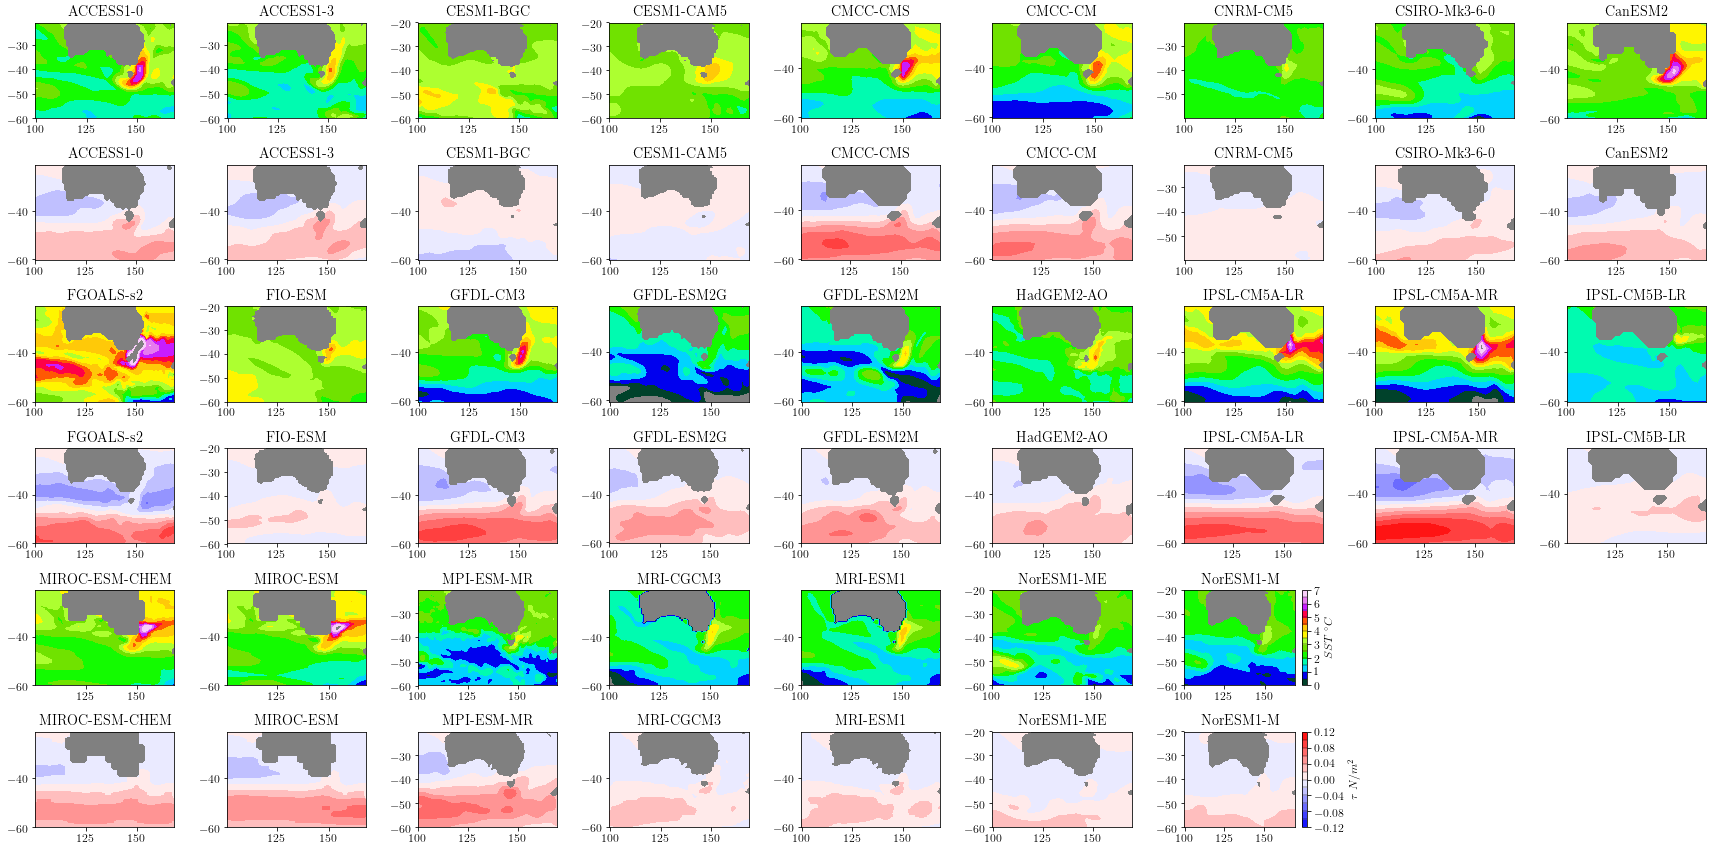

In [13]:
matplotlib.rcParams.update({'font.size': 12}) 
row = 6
col = 9
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.close('all')
fig = plt.figure() 
fig.set_size_inches(24, 12)

count = 0
p = 1
for idx, t in enumerate(plot_list):
    count += 1
    if count is col+1:
        count = 1
        p += 1
    
    ax = fig.add_subplot(row, col, idx+col*(p-1)+1)
    cmap = plt.get_cmap('gist_ncar')
    step = 0.5
    contf_lvls = np.arange(0,7+1e-08,step)              
    ax.set_facecolor('grey')
    lat_N = -20
    lat_S = -60
    lon_W = 100
    lon_E = 170
    lat_N_idx = find_nearest_index(tos_lat[t], lat_N)
    lat_S_idx = find_nearest_index(tos_lat[t], lat_S)
    lon_W_idx = find_nearest_index(tos_lon[t], lon_W)
    lon_E_idx = find_nearest_index(tos_lon[t], lon_E)
    contf = plt.contourf(
        tos_lon[t][lon_W_idx:lon_E_idx],
        tos_lat[t][lat_S_idx:lat_N_idx],
        tos_anom[t][lat_S_idx:lat_N_idx,lon_W_idx:lon_E_idx], contf_lvls, cmap=cmap)
    ax.set_title(t)
    if t is plot_list[-1]:
        cbar = plt.colorbar(contf, orientation='vertical', drawedges=True)
        cbar.set_label(r'$SST$ $^{\circ}C$') 
        cbar.set_ticks(contf_lvls[np.arange(0,np.size(contf_lvls),2)])
        
    
    ax = fig.add_subplot(row, col, idx+col*(p-1)+1+col)
    cmap = plt.get_cmap('bwr')
    step = 0.02
    contf_lvls = np.arange(-0.12,0.12+1e-08,step)              
    ax.set_facecolor('grey')
    lat_N = -20
    lat_S = -60
    lon_W = 100
    lon_E = 170
    lat_N_idx = find_nearest_index(tauuo_lat[t], lat_N)
    lat_S_idx = find_nearest_index(tauuo_lat[t], lat_S)
    lon_W_idx = find_nearest_index(tauuo_lon[t], lon_W)
    lon_E_idx = find_nearest_index(tauuo_lon[t], lon_E)
    contf = plt.contourf(
        tauuo_lon[t][lon_W_idx:lon_E_idx],
        tauuo_lat[t][lat_S_idx:lat_N_idx],
        tauuo_anom[t][lat_S_idx:lat_N_idx,lon_W_idx:lon_E_idx], contf_lvls, cmap=cmap)
    ax.set_title(t)
    if t is plot_list[-1]:
        cbar = plt.colorbar(contf, orientation='vertical', drawedges=True)
        cbar.set_label(r'$\tau$ $N/m^{2}$') 
        cbar.set_ticks(contf_lvls[np.arange(0,np.size(contf_lvls),2)])
    
    
    
#plt.suptitle(r"Wombat jra iaf mom025 tau")
plt.tight_layout()


output_ls = os.listdir(figures_path)
if not script_name:
    script_name = 'test'
elif script_name not in output_ls:
    os.mkdir(figures_path + '/' + script_name)

plt.savefig(figures_path + '/' + script_name + '/' + script_name[0:3] \
            + '_fig1_' + '.png', bbox_inches='tight', dpi=200)
    